<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Anomaly%20Detection/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection


https://towardsdatascience.com/wondering-how-to-build-an-anomaly-detection-model-87d28e50309
https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-anomaly-detection-1233d23dba95

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
%matplotlib inline

## Gaussian Distribution

> $\mu_j = \displaystyle\frac{1}{m}\sum_{i=1}^mx_j^{(i)}$

> $\sigma_j^2 = \displaystyle\frac{1}{m}\sum_{i=1}^m\left( x_j^{(i)} - \mu_j \right)^2$

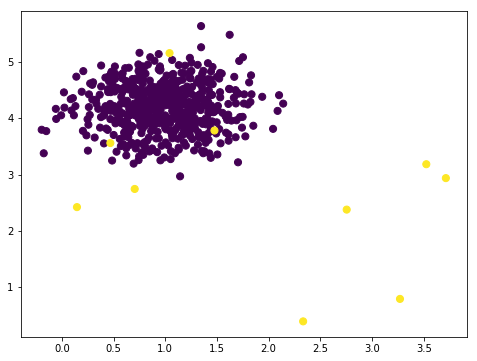

In [62]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=600, centers=1, cluster_std=0.4, random_state=3)

#Add some anomaly points to the dataset
np.random.seed(1)
X_anm = np.random.normal(np.mean(X, axis=0) , np.std(X, axis=0) *4, size=[10, 2])
y_anm = np.ones(10)
X = np.concatenate((X, X_anm))
y = np.concatenate((y, y_anm))

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
#plt.set_xlabel('X0')
#plt.set_ylabel('X1')
plt.show()

In [0]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var
  
  
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p
 

In [0]:
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)

In [65]:
print( "mu=", mu )
print( "mean", np.mean(X, axis=0))
print( "sigma", np.sqrt(sigma2) )
print( "std", np.std(X, axis=0))

mu= [0.99114162 4.17391043]
mean [0.99114162 4.17391043]
sigma [0.43940094 0.48123771]
std [0.43940094 0.48123771]


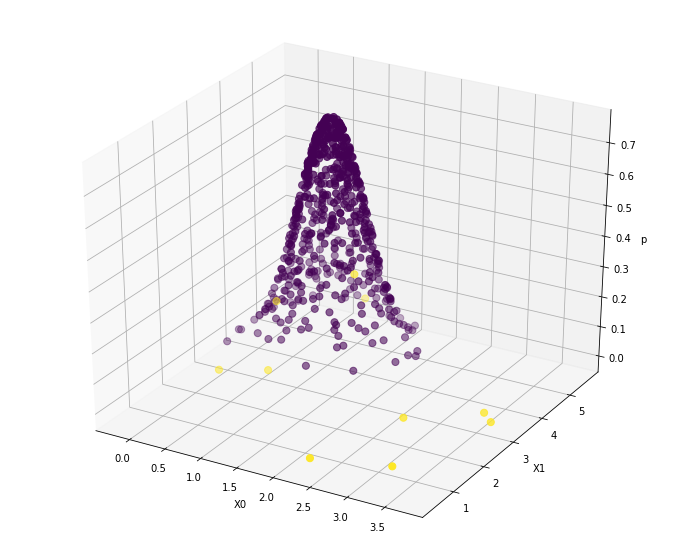

In [66]:
#Make a 3D plot

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.grid(True)
ax.scatter3D(X[:, 0], X[:, 1], p, c=y, s=50, cmap='viridis')
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('p')

plt.show()
  


In [67]:
from sklearn.metrics import f1_score

def selectThreshHold(yval, pval):
    
    f1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval)) / 1000
    epi_range = np.arange(pval.min(), pval.max(), stepsize)
    for epsilon in epi_range:

        pred = (pval < epsilon)
        
        f1 = f1_score(yval, pred, average='micro') 
        
        if f1 > bestF1:
            bestF1 = f1
            bestEpsilon = epsilon
            
    return bestF1, bestEpsilon
  

F1, epsilon = selectThreshHold(y, p)
print("Best F1 score = ", F1)
print("Anomaly threshHold = ", epsilon)

Best F1 score =  0.9934426229508196
Anomaly threshHold =  0.0007492315545869763


In [0]:
anomaly = (p < epsilon)
X_anomaly = np.column_stack([X, anomaly])
X_anomaly = X_anomaly[np.where(X_anomaly[:,2] >= 1.)]

In [69]:
X_anomaly

array([[3.52474144, 3.18515157, 1.        ],
       [0.14628384, 2.42163301, 1.        ],
       [2.33355976, 0.38778388, 1.        ],
       [3.71381804, 2.9377422 , 1.        ],
       [3.27010362, 0.78740869, 1.        ],
       [2.75476385, 2.37706364, 1.        ]])

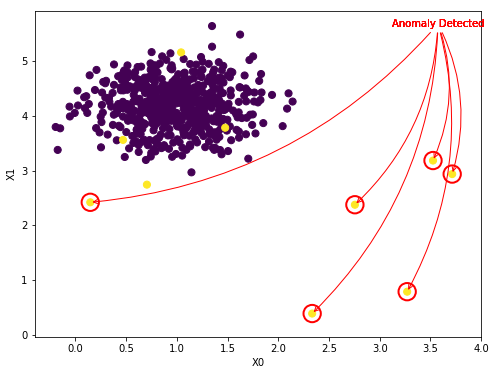

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(X_anomaly[:, 0], X_anomaly[:, 1], s=300, edgecolors='red', facecolors='none', linewidth=2)
for i in range(X_anomaly.shape[0]):
    plt.annotate('Anomaly Detected', xy=(X_anomaly[i,0:2]), color='red', textcoords='axes fraction',xytext=(.8, .95),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2', color='red'))
plt.xlabel("X0")
plt.ylabel('X1')
plt.show()

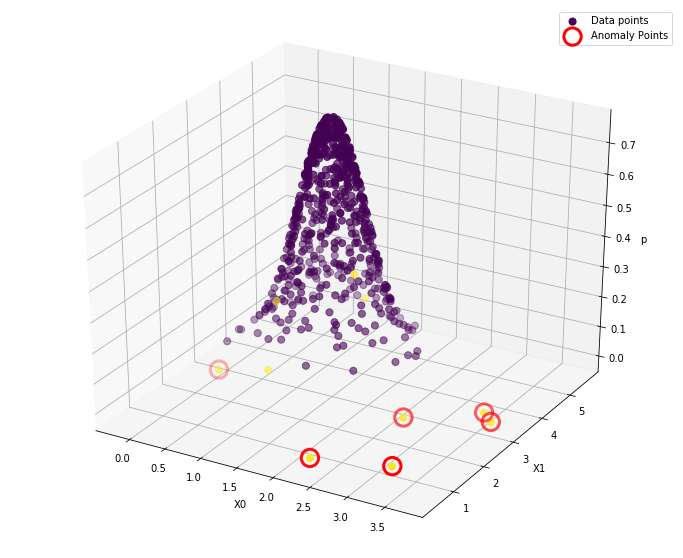

In [103]:
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.grid(True)
ax.scatter3D(X[:, 0], X[:, 1], p, c=y, s=50, cmap='viridis', label='Data points')
ax.scatter3D(X_anomaly[:, 0], X_anomaly[:, 1], epsilon, s=300, edgecolors='red', facecolors='none', linewidth=3, label='Anomaly Points')
#ax.annotate('Anomaly Points', xy=(X_anomaly[0,0:2]), color='red', textcoords='axes fraction',xytext=(.8, .95),
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2', color='red'))
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('p')
ax.legend()

plt.show()